# Задание 1 (6 баллов)

В данном задании мы будем работать со [списком 250 лучших фильмов IMDb](https://www.imdb.com/chart/top/?ref_=nv_mp_mv250)

1. Выведите топ-4 *фильма* **по количеству оценок пользователей** и **количество этих оценок** (1 балл)
2. Выведите топ-4 лучших *года* (**по среднему рейтингу фильмов в этом году**) и **средний рейтинг** (1 балл)
3. Постройте отсортированный **barplot**, где показано **количество фильмов** из списка **для каждого режисёра** (только для режиссёров с более чем 2 фильмами в списке) (1 балл)
4. Выведите топ-4 самых популярных *режиссёра* (**по общему числу людей оценивших их фильмы**) (2 балла)
5. Сохраните данные по всем 250 фильмам в виде таблицы с колонками (name, rank, year, rating, n_reviews, director) в любом формате (2 балла)

Использовать можно что-угодно, но полученные данные должны быть +- актуальными на момент сдачи задания

In [ ]:
# Ваше решение здесь

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

import requests
from bs4 import BeautifulSoup

In [ ]:

# send a request and read an html content
response = requests.get("https://www.imdb.com/chart/top/?ref_=nv_mp_mv250")
soup = BeautifulSoup(response.content, "lxml")

In [ ]:
df = pd.read_html(response.content, header=0)[0]
df

,Unnamed: 0,Rank & Title,IMDb Rating,Your Rating,Unnamed: 4
0,NaN,1. The Shawshank Redemption (1994),9.2,12345678910 NOT YET RELEASED Seen,NaN
1,NaN,2. The Godfather (1972),9.2,12345678910 NOT YET RELEASED Seen,NaN
2,NaN,3. The Dark Knight (2008),9.0,12345678910 NOT YET RELEASED Seen,NaN
3,NaN,4. The Godfather Part II (1974),9.0,12345678910 NOT YET RELEASED Seen,NaN
4,NaN,5. 12 Angry Men (1957),9.0,12345678910 NOT YET RELEASED Seen,NaN
...,...,...,...,...,...
245,NaN,246. The Help (2011),8.0,12345678910 NOT YET RELEASED Seen,NaN
246,NaN,247. Dersu Uzala (1975),8.0,12345678910 NOT YET RELEASED Seen,NaN
247,NaN,248. Aladdin (1992),8.0,12345678910 NOT YET RELEASED Seen,NaN
248,NaN,249. Dances with Wolves (1990),8.0,12345678910 NOT YET RELEASED Seen,NaN


In [ ]:
# let' rename the rating column
df = df.rename(columns={'IMDb Rating': 'rating'})

In [ ]:
# let's filter columns by breaking one into rank, name, and year

df_filtered = df.iloc[:, [1,2]]

df_filtered['rank'] = df_filtered['Rank & Title'].apply(lambda x: int(x.split('. ')[0]))
name_year = df_filtered['Rank & Title'].apply(lambda x: re.split(r' (?=\(\d{4})', ' '.join(x.split(' ')[1:])))
df_filtered['name'] = [film[0].strip() for film in name_year]
df_filtered['year'] = [int(film[1][-5:-1]) for film in name_year]

df_filtered = df_filtered.iloc[:, 1:]
df_filtered

<ipython-input-5-448cf770f45f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['rank'] = df_filtered['Rank & Title'].apply(lambda x: int(x.split('. ')[0]))
<ipython-input-5-448cf770f45f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['name'] = [film[0].strip() for film in name_year]


,rating,rank,name,year
0,9.2,1,The Shawshank Redemption,1994
1,9.2,2,The Godfather,1972
2,9.0,3,The Dark Knight,2008
3,9.0,4,The Godfather Part II,1974
4,9.0,5,12 Angry Men,1957
...,...,...,...,...
245,8.0,246,The Help,2011
246,8.0,247,Dersu Uzala,1975
247,8.0,248,Aladdin,1992
248,8.0,249,Dances with Wolves,1990


In [ ]:
# find the mark responsible for viewers' rating
print(soup.find_all('strong')[0])

# and add a column with that
pattern = r'(\d[\d,]*) user ratings'
df_filtered['n_reviews'] = list(map(lambda x: int(re.search(pattern, str(x)).group(1).replace(',', '')), soup.find_all('strong')))

<strong title="9.2 based on 2,718,436 user ratings">9.2</strong>


In [ ]:
# Выведите топ-4 фильма по количеству оценок пользователей и количество этих оценок (1 балл)
df_filtered.sort_values('n_reviews', ascending=False).iloc[:4].loc[:, ['name', 'n_reviews']]

,name,n_reviews
0,The Shawshank Redemption,2718436
2,The Dark Knight,2691165
13,Inception,2388339
11,Fight Club,2161947


In [ ]:
# Выведите топ-4 лучших года (по среднему рейтингу фильмов в этом году) и средний рейтинг (1 балл)
df_filtered.groupby('year').mean().sort_values('rating', ascending=False).loc[:, ['rating']].head(4)

,rating
year,
1972,9.20
1994,8.76
1991,8.55
1974,8.55


In [ ]:
# create a column with directors
import itertools

html_of_dicks = soup.find_all(attrs={"class": "titleColumn"})
print(html_of_dicks[0])

pattern = r'title="(.*?)"'

dicks = map(lambda x: re.search(pattern, str(x)).group(1), html_of_dicks)
dicks = list(map(lambda x: x.split(', ')[0][:-7], dicks))

df_filtered['director'] = dicks
df_filtered.head()

<td class="titleColumn">
      1.
      <a href="/title/tt0111161/" title="Frank Darabont (dir.), Tim Robbins, Morgan Freeman">The Shawshank Redemption</a>
<span class="secondaryInfo">(1994)</span>
</td>


,rating,rank,name,year,n_reviews,director
0,9.2,1,The Shawshank Redemption,1994,2718436,Frank Darabont
1,9.2,2,The Godfather,1972,1888882,Francis Ford Coppola
2,9.0,3,The Dark Knight,2008,2691165,Christopher Nolan
3,9.0,4,The Godfather Part II,1974,1288923,Francis Ford Coppola
4,9.0,5,12 Angry Men,1957,803385,Sidney Lumet


In [ ]:
# Постройте отсортированный barplot, где показано количество фильмов из списка 
# для каждого режисёра (только для режиссёров с более чем 2 фильмами в списке) (1 балл)

from collections import Counter

name_counts = Counter(dicks)
filtered_dict = {k: v for k, v in name_counts.items() if v > 2}
sorted_dict = dict(sorted(filtered_dict.items(), key=lambda x:x[1]))

print(sorted_dict)

{'Francis Ford Coppola': 3, 'Peter Jackson': 3, 'David Fincher': 3, 'Frank Capra': 3, 'James Cameron': 3, 'Ridley Scott': 3, 'Pete Docter': 3, 'Clint Eastwood': 3, 'Ingmar Bergman': 3, 'Brad Bird': 3, 'Sergio Leone': 4, 'Hayao Miyazaki': 4, 'Quentin Tarantino': 5, 'Charles Chaplin': 5, 'Billy Wilder': 5, 'Alfred Hitchcock': 6, 'Christopher Nolan': 7, 'Steven Spielberg': 7, 'Martin Scorsese': 7, 'Akira Kurosawa': 7, 'Stanley Kubrick': 7}


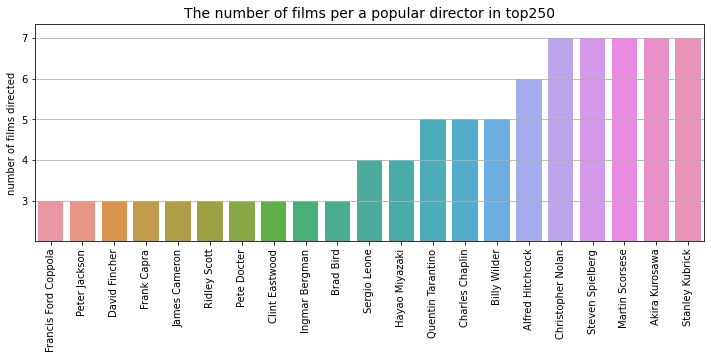

In [ ]:
plt.figure(figsize=(12,4))

sns.barplot(x=list(sorted_dict.keys()), y=list(sorted_dict.values()))
plt.title('The number of films per a popular director in top250', fontsize=14)

plt.xticks(rotation=90); plt.ylabel('number of films directed')
plt.yticks(range(min(sorted_dict.values()), 1 + max(sorted_dict.values())))
plt.ylim(bottom=min(sorted_dict.values())-1)
plt.grid(axis='y', which='both')

In [ ]:
# Выведите топ-4 самых популярных режиссёра (по общему числу людей оценивших их фильмы) (2 балла)
df_filtered.groupby('director').sum().sort_values('n_reviews', ascending=False).index[:4]

Index(['Christopher Nolan', 'Quentin Tarantino', 'Steven Spielberg',
       'Martin Scorsese'],
      dtype='object', name='director')

In [ ]:
# Сохраните данные по всем 250 фильмам в виде таблицы с колонками (name, rank, year, rating, n_reviews, director) в любом формате (2 балла)
df_filtered.reindex(columns=['name', 'rank', 'year', 'rating', 'n_reviews', 'director']).to_csv('top250_imbd.csv', index=False)
df_filtered.reindex(columns=['name', 'rank', 'year', 'rating', 'n_reviews', 'director'])

,name,rank,year,rating,n_reviews,director
0,The Shawshank Redemption,1,1994,9.2,2718436,Frank Darabont
1,The Godfather,2,1972,9.2,1888882,Francis Ford Coppola
2,The Dark Knight,3,2008,9.0,2691165,Christopher Nolan
3,The Godfather Part II,4,1974,9.0,1288923,Francis Ford Coppola
4,12 Angry Men,5,1957,9.0,803385,Sidney Lumet
...,...,...,...,...,...,...
245,The Help,246,2011,8.0,467518,Tate Taylor
246,Dersu Uzala,247,1975,8.0,31329,Akira Kurosawa
247,Aladdin,248,1992,8.0,430647,Ron Clements
248,Dances with Wolves,249,1990,8.0,273061,Kevin Costner


# Задание 2 (10 баллов)

Напишите декоратор `telegram_logger`, который будет логировать запуски декорируемых функций и отправлять сообщения в телеграм.


Вся информация про API телеграм ботов есть в официальной документации, начать изучение можно с [этой страницы](https://core.telegram.org/bots#how-do-bots-work) (разделы "How Do Bots Work?" и "How Do I Create a Bot?"), далее идите в [API reference](https://core.telegram.org/bots/api)

**Основной функционал:**
1. Декоратор должен принимать **один обязательный аргумент** &mdash; ваш **CHAT_ID** в телеграме. Как узнать свой **CHAT_ID** можно найти в интернете
2. В сообщении об успешно завершённой функции должны быть указаны её **имя** и **время выполнения**
3. В сообщении о функции, завершившейся с исключением, должно быть указано **имя функции**, **тип** и **текст ошибки**
4. Ключевые элементы сообщения должны быть выделены **как код** (см. скриншот), форматирование остальных элементов по вашему желанию
5. Время выполнения менее 1 дня отображается как `HH:MM:SS.μμμμμμ`, время выполнения более 1 дня как `DDD days, HH:MM:SS`. Писать форматирование самим не нужно, всё уже где-то сделано за вас

**Дополнительный функционал:**
1. К сообщению также должен быть прикреплён **файл**, содержащий всё, что декорируемая функция записывала в `stdout` и `stderr` во время выполнения. Имя файла это имя декорируемой функции с расширением `.log` (**+3 дополнительных балла**)
2. Реализовать предыдущий пункт, не создавая файлов на диске (**+2 дополнительных балла**)
3. Если функция ничего не печатает в `stdout` и `stderr` &mdash; отправлять файл не нужно

**Важные примечания:**
1. Ни в коем случае не храните свой API токен в коде и не загружайте его ни в каком виде свой в репозиторий. Сохраните его в **переменной окружения** `TG_API_TOKEN`, тогда его можно будет получить из кода при помощи `os.getenv("TG_API_TOKEN")`. Ручное создание переменных окружения может быть не очень удобным, поэтому можете воспользоваться функцией `load_dotenv` из модуля [dotenv](https://pypi.org/project/python-dotenv/). В доке всё написано, но если коротко, то нужно создать файл `.env` в текущей папке и записать туда `TG_API_TOKEN=<your_token>`, тогда вызов `load_dotenv()` создаст переменные окружения из всех переменных в файле. Это довольно часто используемый способ хранения ключей и прочих приватных данных
2. Функцию `long_lasting_function` из примера по понятным причинам запускать не нужно. Достаточно просто убедится, что большие временные интервалы правильно форматируются при отправке сообщения (как в примерах)
3. Допустима реализация логирования, когда логгер полностью перехватывает запись в `stdout` и `stderr` (то есть при выполнении функций печать происходит **только** в файл)
4. В реальной жизни вам не нужно использовать Telegram API при помощи ручных запросов, вместо этого стоит всегда использовать специальные библиотеки Python, реализующие Telegram API, они более высокоуровневые и удобные. В данном задании мы просто учимся работать с API при помощи написания велосипеда.
5. Обязательно прочтите часть конспекта лекции про API перед выполнением задания, так как мы довольно поверхностно затронули это на лекции

**Рекомендуемые к использованию модули:**
1. os
2. sys
3. io
4. datetime
5. requests
6. dotenv

**Запрещённые модули**:
1. Любые библиотеки, реализующие Telegram API в Python (*python-telegram-bot, Telethon, pyrogram, aiogram, telebot* и так далле...)
2. Библиотеки, занимающиеся "перехватыванием" данных из `stdout` и `stderr` (*pytest-capturelog, contextlib, logging*  и так далле...)



Результат запуска кода ниже должен быть примерно такой:

In [ ]:
from datetime import timedelta
import io
import os
import requests
import sys
import time


def telegram_logger(chat_id):
  def decorator(func):
    def inner_function(*args, **kwargs):
      # steal stdout and stderr into variables
      original_out = sys.stdout
      original_err = sys.stderr

      # create an object to write stdout and stderr into
      output = io.StringIO()
      sys.stdout = output
      sys.stderr = output

      try:
        start = time.time()
        result = func(*args, **kwargs)
        delta_time = timedelta(seconds=time.time() - start)
        message = f"🎉 Function `{func.__name__}` successfully finished in `{delta_time}`"

      except Exception as e:
        message = f"😞 Function `{func.__name__}` failed with an exception:\n"
        message += f"\n`{type(e).__name__}: {str(e)}`"

      finally:
        # return stdout and stderr back to normal functioning 
        sys.stdout = original_out
        sys.stderr = original_err

        # if there's a file to send -- send it
        if len(output.getvalue()):
          url = f'https://api.telegram.org/bot{TOKEN}/sendDocument'
          data = {'chat_id': chat_id, 'parse_mode': 'MarkdownV2', 'caption': message}

          # Convert StringIO object to string and Encode the string as bytes
          output_bytes = output.getvalue().encode('utf-8')
          my_file_like_object = io.BytesIO(output_bytes)  # Create BytesIO object from bytes
          my_file_like_object.name = f'{func.__name__}.log'

          files = {'document': my_file_like_object}
          response = requests.post(url, data=data, files=files)

        # otherwise, send just a message 
        else:
          url = f'https://api.telegram.org/bot{TOKEN}/sendMessage'
          data = {'chat_id': chat_id, 'parse_mode': 'MarkdownV2', 'text': message}
          response = requests.post(url, data=data)

    return inner_function
  return decorator


CHAT_ID = "" #<- INSERT URS 
TOKEN = "" #<- INSERT URS 


@telegram_logger(CHAT_ID)
def good_function():
    print("This goes to stdout")
    print("And this goes to stderr", file=sys.stderr)
    time.sleep(2)
    print("Wake up, Neo")

@telegram_logger(CHAT_ID)
def bad_function():
    print("Some text to stdout")
    time.sleep(2)
    print("Some text to stderr", file=sys.stderr)
    raise RuntimeError("Ooops, exception here!")
    print("This text follows exception and should not appear in logs")
    
@telegram_logger(CHAT_ID)
def long_lasting_function():
    time.sleep(2)


good_function()

bad_function()

long_lasting_function()

A sequence for debugging the third task

In [ ]:
seq = '''>NC_000017.11:c7687490-7668421 Homo sapiens chromosome 17, GRCh38.p14 Primary Assembly
CTCAAAAGTCTAGAGCCACCGTCCAGGGAGCAGGTAGCTGCTGGGCTCCGGGGACACTTTGCGTTCGGGC
TGGGAGCGTGCTTTCCACGACGGTGACACGCTTCCCTGGATTGGGTAAGCTCCTGACTGAACTTGATGAG
TCCTCTCTGAGTCACGGGCTCTCGGCTCCGTGTATTTTCAGCTCGGGAAAATCGCTGGGGCTGGGGGTGG
GGCAGTGGGGACTTAGCGAGTTTGGGGGTGAGTGGGATGGAAGCTTGGCTAGAGGGATCATCATAGGAGT
TGCATTGTTGGGAGACCTGGGTGTAGATGATGGGGATGTTAGGACCATCCGAACTCAAAGTTGAACGCCT
AGGCAGAGGAGTGGAGCTTTGGGGAACCTTGAGCCGGCCTAAAGCGTACTTCTTTGCACATCCACCCGGT
GCTGGGCGTAGGGAATCCCTGAAATAAAAGATGCACAAAGCATTGAGGTCTGAGACTTTTGGATCTCGAA
ACATTGAGAACTCATAGCTGTATATTTTAGAGCCCATGGCATCCTAGTGAAAACTGGGGCTCCATTCCGA
AATGATCATTTGGGGGTGATCCGGGGAGCCCAAGCTGCTAAGGTCCCACAACTTCCGGACCTTTGTCCTT
CCTGGAGCGATCTTTCCAGGCAGCCCCCGGCTCCGCTAGATGGAGAAAATCCAATTGAAGGCTGTCAGTC
GTGGAAGTGAGAAGTGCTAAACCAGGGGTTTGCCCGCCAGGCCGAGGAGGACCGTCGCAATCTGAGAGGC
CCGGCAGCCCTGTTATTGTTTGGCTCCACATTTACATTTCTGCCTCTTGCAGCAGCATTTCCGGTTTCTT
TTTGCCGGAGCAGCTCACTATTCACCCGATGAGAGGGGAGGAGAGAGAGAGAAAATGTCCTTTAGGCCGG
TTCCTCTTACTTGGCAGAGGGAGGCTGCTATTCTCCGCCTGCATTTCTTTTTCTGGATTACTTAGTTATG
GCCTTTGCAAAGGCAGGGGTATTTGTTTTGATGCAAACCTCAATCCCTCCCCTTCTTTGAATGGTGTGCC
CCACCCCGCGGGTCGCCTGCAACCTAGGCGGACGCTACCATGGCGTGAGACAGGGAGGGAAAGAAGTGTG
CAGAAGGCAAGCCCGGAGGTATTTTCAAGAATGAGTATATCTCATCTTCCCGGAGGAAAAAAAAAAAGAA
TGGGTACGTCTGAGAATCAAATTTTGAAAGAGTGCAATGATGGGTCGTTTGATAATTTGTCGGAAAAACA
ATCTACCTGTTATCTAGCTTTGGGCTAGGCCATTCCAGTTCCAGACGCAGGCTGAACGTCGTGAAGCGGA
AGGGGCGGGCCCGCAGGCGTCCGTGTGGTCCTCCGTGCAGCCCTCCGGCCCGAGCCGGTTCTTCCTGGTA
GGAGGCGGAACTCGAATTCATTTCTCCCGCTGCCCCATCTCTTAGCTCGCGGTTGTTTCATTCCGCAGTT
TCTTCCCATGCACCTGCCGCGTACCGGCCACTTTGTGCCGTACTTACGTCATCTTTTTCCTAAATCGAGG
TGGCATTTACACACAGCGCCAGTGCACACAGCAAGTGCACAGGAAGATGAGTTTTGGCCCCTAACCGCTC
CGTGATGCCTACCAAGTCACAGACCCTTTTCATCGTCCCAGAAACGTTTCATCACGTCTCTTCCCAGTCG
ATTCCCGACCCCACCTTTATTTTGATCTCCATAACCATTTTGCCTGTTGGAGAACTTCATATAGAATGGA
ATCAGGCTGGGCGCTGTGGCTCACGCCTGCACTTTGGGAGGCCGAGGCGGGCGGATTACTTGAGGATAGG
AGTTCCAGACCAGCGTGGCCAACGTGGTGAATCCCCGTCTCTACTAAAAAATACAAAAATTAGCTGGGCG
TGGTGGGTGCCTGTAATCCCAGCTATTCGGGAGGGTGAGGCAGGAGAATCGCTTGAACCCGGGAGGCAGA
GGTTGCAGTGAGCCAAGATCGTGCCACTACACTCCAGCCTGGGCGACAAGAACGAAACTCCGTCTCAAAA
AAAAGGGGGGAATCATACATTATGTGCTCATTTTTGTCGGGCTTCTGTCCTTCAATGTACTGTCTGACAT
TCGTTCATGTTGTATATATCAGTATTTTGCTCCTTTTCATTTAGTATAGTCCATCGATTGTATATCCGTC
CTTTTGATGGCCTTTTGAGTTGTTTCCCATTTGCGGTTATGAAATAAAGCTGCTATAAACATTCTTGTAC
AATTCTTTTTGTGATCATATGTTTTCGTGTTTCTTGGAGAAATACTTAGGAGGGGAATTGCGAGTTTGGA
AGTAAAAAGTAGCTGTATTTTGAACTTTTTCAGAAGCTCTGAGTTTTCCAGAGCGGTTGTACCATTTTAC
ACTCCAACTAGCAAGGTATGGGAGTTATTATGGTTGTGCCACAGCCTTCCGGACATTAGGTATTGTCAGT
CTTTCTAATGTGGTATATCCTTGTGGTTGTAATTTACAGTTCTCTATTGACTAAGGATGTTCAGCATTTT
TTCATGTGCCTATTGGCCATTCGTATTTTGTTTGTAAAGTAGCTCTTCGAGTCTTTTACCTGTTATTTTG
GTTTTTTGTTTGTTTTTATTGTTCAGTTGTGGGACTGCTTTATACATTCTGGATACAAGTCCTTTATCAG
ATCCATGTGTCGTGAATGTTTTCTTCTGATCTGTTGCTTGCCTATTTGTTTGCTTTACAGAGTTTACAGT
ATCTTAAGAGGAGTGGATTTATCTTTTTTATGTTCAGTATTTGCCTTGTCCTGTTTAGGACATCTTTTTT
TTTTTTTTTAACCCCAGGGTCATGAAGATATTATCTTACATTTTCTTTTAGGACCTTTATGGTTGTAAGT
TTTACAGTAAGGTCCTTGAGCCATTAATTAATTCTTAAAATTAATTGTTTATGGTGTGAGGTGTAGGAGT
CAGTCTCTGGTATCTTTCCTGTATGGAAATCCAGTTATTCTGTCTCCACTTGTTGAAATAGGCTTCCTTT
CTCTACTGAATGCTTTTAATTTTAATTATTTTACAGTTGGAGTATAGGGCTACCATTTTAGTGCTATTTT
CTTTTTTTCTTTGTTAATTTTTGAGACAGGGACTCACACTGTTGCCCAGGCTAGAGTACAATGGCACAAT
CAAGGCTTACTGCAGCCTCGAACCCCTGGGCTCAAGCAGTCCTCTAGCAGCCTCACGAGTAGCTGGGATT
ACTCCACCACACCCAGCTAACTATTTTATTTTTTTGTATTGACAGGATCTCACTATGTTGCCCAGGCTGG
TCTCAAACTGCTGGCCTCAAGCTTTCATCCCATCTCGGCCTCCCAAAGTGCTGGGATTACAGGTGTGAGC
CACCATGCCTGACCTCTTAGTGCTATTTTCTATTTATCTCCTCTGTTCTCTGCTCTCTTTAAACGTTGGA
GGAAGAAACAGTACCCATCTTACACAAACTCTTCAGAAAACAGAGGAACAGACTGGGCGCGGTGGCTCAT
ACCTGTAATCTCAGCACTTTGGTACGCTGAGGCAGGGGATCATTTGAGGTCGGGAGTTCGAGACCAGCCT
GGCCAACACGGCGAAACCCCATCTCTACTAAAAATACAAAAAGTAGCTAGGCGTGGTGACACATACCTGT
AATGCCAGTTACTCAGGAGGCTGAGGCACAAGAATCCCTTGAACCTGGGAAGCGGAGGTTGCAGTGAGCC
GAGATTGCGCCACTGCACTCCAGCCTGGGCAACAGAGTGAGACCCTGTCTCAGAAAAAAAAAGAAAGAAA
GAAAAAATAGAGGAATATTTCCCAACTTGTTTTCGAAGCCAGCATAATCCTGGTACCAAAACCAAACAAG
GACATTATAAGAAAAGAAAATATAGACCAATATTCCTGTTAGCATAGACATGCAACAGCTAACCAATTTT
AGCAAACCAAACCTGGTAATATAGAAAAAAGGATAAATAGGCCAGTCGCGGTGGCTCACGCCTGTAATCC
CAGCACTTTGGGAGGCTGAGGCAGGCAGATCACTTGAGGTCAGGAGTTTGAGACCAGCCTGACCAACATG
GTGAAACCCCGTTTCTAATAAAAATACAAAAATCAGGCTGGGCACGGTGGCTCACGCCTGTAATCCCAGC
ACTTTGGGAGGCCGAGGTGGGCAGATCACGAGGTCAGGAGTTCAAGACCAGCCTGACCAATGTGGTGAAA
CGCCATCTCTACTAAAAATACAAAAATCAGCCGGTGTGGTGGCACCTGCCTGTAATCCCAGCTACTCAGG
AGGCTGAGGCAGAATTGCTTGAACCCGGGAGGCAGAGGTTGCAGTGAGCCAAGATCGTGCCACTGCACTC
CAGCCTGGGCGACAGAGCAAGACTTCATCTCAAAAAAAAAAAAAAATTAGCTGGGCATGGTGGTGGGCAC
CTGAAATCCCAGCTACTCGGGAGTCTGAGGCAGGAGAATCGCTTGAACCCAGGAGGCAGAAGTTGCACTG
AGCTGGGATCACACCATTGCACTCCAGCCTGGGCAACAGAGTGAGACTCCATCTCAAAAAAAGAAAAAGA
AAAAGGATAAATACATTCTAACCAAATAATGTTTATCTCATGATTGTAGCTGATTCAACATTCAAAAATT
GGCCTGGTGCAGTAGCTCAGGCCTGTAATCCCAACATTTTAGGAGGCTGAGGCAGGAAGATCTCTTGAGC
CCAGGATTTCAAGACCAGCCTGGGCAACATAGTCAGACTGGTCTTTACTGGGGGGAAAAAAATCAGTCTG
TGTAATTCACCACATTAACAAAGGGAAACATAAAAACCCTATGATCATTTCAACAGATGTAGCAAAAGCA
GTTAATGATATTCAACACATATGCATGATTACAAACCAACCAACCTCCTAGCAAACTAGGGAAAGGAAAC
TTAACCTAGTTTGATAACAGGGCGTCCACAGTCGGAGTTCCACTAGCAGCATACATAATGGTAGAAAACT
CAGTGCTGCCGGGCGCGGTGGCTCACGCCTGTAATGCCAGCACTTTGGGAGGCCTAGGCGGGCGGATCAC
GAGGTCAGGAGATCGAGACTGTCCTGACTAGCATGCTGAAACCCCGTCTCTACTAAAAATACAAAAACAA
AAAATTAGCCGGGCATGGTGGCGGGCGCCTATAGTCCCAGCTACTCGGGAGGCTGAGGCGAGAGAATGGC
GTGAACCCGGGAGGCGGAGCTTGCAGAGCCTAGATCGTGCCACTGCACTCCAGCCTGGGTGACAGAGTGA
GACTTCGTCTCAAAAAAAAAAAAAAAAAAAAAAGAAAAGAAAACTCAACGCTTTTTCCTCTAAGATCAGG
AACTAGAAAAGGATTTGACTCTCACAACGTTGATACCATACTGGAGGTTTTAACCAGGCAAGAAAAAGAA
ATAATGAGGGCCGGGTGCGGTGGCTCAGGCCTGTAATCCCAGCACTTTGGGAAGCCGAGACGGGTGGATC
ACGAGGTCAGGAGATCGAGACCATCCTGGCTAACACGGTGAAACCCTGTCTCTACTAAATATACAAAAAA
TTAGCCGGGCGTAGTGGCGGGCGCCTGTAGTCCCAGCTACTCGGGAGGCTGAGGCAGGAGAATGGCGTGA
ACTCAGGGGGCGGAGCTTGCAGTGAGCTGAGATCGAGCCACTGCACTCCAGCCTGGGCGACAGAGCAAGA
CTGTGTCTCAAAAAAAAAAAAAGAAAAAGAAATAATGATTAGTGGCCCGATGTCTCACGCCTATAATCCC
AGCACTTTGGGAGGCCGAGGTGGGCAGATCACCTGAGGTCTGGAGTTGGAGACCAGCCTGACAAAGATGG
TGAAACCTCGTCTCTATTAAAATATTAAAAAAATAGCCAGGCGTTGGCCGGGTACAGTGGCTCATGCCTG
TAATCCCAGCACTTTGGGAGGCCGAGGTGGGTGGATCACCTGAGGTCAGGAGTTCAACACCAGCCTGGCC
AACATGGTGAAACCCCATCTCTACTAAAAATACAAAAATTAGCCGGGCGTAGTGGCGGGCGCCTGTAATC
CCAGCTACTTGGGAGGCTTAGGCAGGAGAATCGCTTGAACCTGGGAGGCGGAGGTTGTAGTGAGCCGAGA
TTGCACCATTGCACTCCAGCCTGGGTGACAAAAGCAAAAACTCCGTCTCAAAAAAAAAAGAATTAGCCAG
GGGTAGTGGTGAACGCCTGTAGTCCCAGCTACTCAGGAGGCAGAGGCAGGAGAATCACTTGAACCCAGGA
GGCAGAGGTTGCAGTGAGCCGAGATTGTCCCATTGCACTCCAGCCTAGGCGACAAGAGCAAAATTCCATG
TCAAAAAAAAAAAAAAAAAAGGAAAGAAAAAAAATAACGATTAGAAAGGAAGAAATAAAACACATTCACA
GCCAGTATGATTCTATACATACATGTCCTAATGGGGCCAGGCGTGGTGGCTCATGCCTGTAATCCTAGCA
CTTTTAGGAGGCTGAGGCAGGTGGCTTCCCTGGGACCAGCCTGGCCAACATGGTGAAACCCCAACTCTAA
TAAAAATACAAAAAATCAGCCAGGCGTGGTGACGGGCACCTCTAATCCCAGCTACTCAGGAGGCTGAGGC
AGGAGAATTGCTTGGACCTGGGAGGCAGAGGTTGCAGTGAGCCGAGATCGCGCTATTGCACTCCAGCCTG
GGCAACAAGAGTGAAACTCCGGCAGGGTGTGGTGGCTTACGCCTGTAATCCCAGCACTTCGGGAGGCTGA
GGCAGGCCGATCACCTGAGGTCAGGAGTTTGAGACCAACCTAACATGGTGAAACCCCGTCTCTACTAAAA
ATACAAGAATTAGCTGGGTGTAGTGGTGGGCGCCTGTAATCCCAGCTACTTGGGAGGCTGAGACAGAAGA
ATTGCTTGAACCCAGGAGGTGGAGGTTGCAGTGAGCTGAGATCATGCCATTGCACACCACGCCGGGCAAC
AGAGCGAGATTCCGTCTCAAAAAAAAAAAAAAAGAGTGAAACTCTATCTCAAAAAAAAAAAAAAGTCCTA
ATGGAAAATCCATAAAAAGCTACCAAAACTAATAAATAAATATAGCAGGGTTGCAGGTTACAGGGCAATA
TAGTTATCCCTCTATCTGTAGGGGCTTGGTTCTGGGACTCCTCACACACCAAACCCACAGATGTCTAAGT
CCCATATATAAGACGGTATAGTATTTGGATTTAACCTACACATATCCTCCCATATAGTTTAAATTATCTC
TAGATTACTTACATTACCCCCATACAATGAAAATGCTAATGTACATGCAAGTATGTATGTAAGTACTTGT
ACTATATTGTTTAGGGAATCACTGGACATATAGGCCTTCAAGACTGATACCAGCAGCCACTGTTAAGATT
CTGGTCAGGCCTGCCCCTGTTTGGGGTCTCAGTTGATCTCATTGCCTTCCCACCCAGCCAAGGGCACCTG
CATTTCTCTTGGCTCCCTGGCCATTTGGAAGGCCTAGTTCAGCCTGGCACATTTGTATCCTGGCCCACTG
ATGCTGGTACCCCTGGGAAGGTCCTGCTCTGAAAAACACGGAGATTTTAGTTGCTACTGAAGATTTGAGA
GATAAAGACAGGGAGACCTGTCTGTAGACCTGTGTCCCTCCAAGTGGGATTGAGACTTTGGGCCCCCCAT
TTCAGGACAGCACCTCCTGGCCTGTTGACTGAATAGATCCCTGAAGGAGGTGTACTTGCATTAATGGAGT
GGGGGTGGGAGCAGTACCACAGATCCGCACTAACAATCACACAGTTCTCTCTAGAATAATAATATAGAAC
AAGTGAAATAGAACAATTGCAGAAAGAGCTAACCTTTGTTGAGCTCTTACTGTGTGCCCAGCACTTTCCT
CAACTCTACATTTCCCATAATACACAGAGTACTAGGTAGGCCAGGCTTGGTGGCTCACGCCTGTAATCCC
AGCACTTTAGGAGGCCAAGGGGGGTGGATCACCTGAGGTCGGGAGTTCAAGACCAGCCTGACCAACATGG
TGAAACCCCGTCTCTACTAGAAGTACAAAATTAGCCAGGTGTGGTGGCACATGCTTGTAGTCCTAGCTAC
TCAGCAGGCTGAGGCAGGAGAATCATTTGAATCCGGGAGGAGGTTGCAGTAAGCGGAGATAGTGCCACTG
TACTCCAGCCTGGGCAATAAGAGCTGAGACTCCGTCTCAAAATAAAATAAAATAAAATAAAATAAAATAA
AATAAAATAAAAAAAGAAAAGAGCCTGCCATTAAAGGAGCTGTTTGGTAGGGGATGTTTTGTCAGTGCAA
ACAACAGAAAAGTGGGCTGGGCACAGTGGTTCATGCCTGTAATCCCAGCACTTTGGGAGGCCAAGGCGGG
CGGATCACCTGAAGTTGGGAGTTCAAGACCAGCCTGACCAATATGGAGAAACCCCGTCTCTACTAAAAAT
ACAAAATTAGCCGGGCGCAGTGGCGCATGCCTGTAATCCCAGCTACTCGGGAGGCTGAGGCAGGAGAATC
GCTTGAACCTGGGAGGCAGAGGTTGCGGTGAGCCGAGATCGCACCATTGCACTCCAGCCTGGACGAGAGC
AAAACTCTGTCTCAAAAAAAAAAAAAAACAGAAAAGTGTAACAAACACTTACAGTAGGCATGTTTCTTAG
CAAATCTGATGACAAATTTGGCATAAAGAAAGAGAGCATCCCTGAAAAAAAAAAAAAGAAAAAGAAAGAG
AGCATCCTGCCTGGGCAACATAGTGAAACCCTGCCTCTACAAAAAAACTCAAAAATTGGCCGGGTGCAGT
GGCTCACACCTGTAATCCCAGCACTTTGGGAGTCGGAGGCGGGAGGATCACCTGAGGTCAGGAGTTCGAA
ACCAGCCTGGCCAACATGGCAAAACCCCATCTCTACTAAAAATACAAAAAATTAATCAGGCGCATTGGTG
GGCGCCTGTAATCCCAGCTACTCAGGAAGTTGAGGCAAGAGGATCGCTTGAATCTGGGAGGTGGAGGTTA
CAGTGAGTCGAGATCACACCACTGCACTCTAGCCTGGGTGACAGGGCGAGACTCCGTCTCCAAAAAAAAA
AAGAAAAAGAAAAAGACTAAAAAATTAGCCAGGCAGGCCTCTGTGGTCCCAGCTACTTGGGAGGCTGAGG
CAGGAGAATCACTGAGCCCAGGAGTCCGAGGCTGTAGTGAGCCATGATTGCACCACTGTACCCTAGCTTG
GGCAACAAAGCAAGACCCTGCCTCAAAAGAAAAAAGAAAGAAAGAAAGAACATGGCGGGCCAGGCACAGT
GGCTCACACCTGTAATCCCAGCGCTTTGAGAGGCCGAGGCAGGTGGATCACAAGGTCAGGAGTTCCACAC
CAGCCTGGCCAACATGGTGAAACCCTGTCTCTACTAAAAATACAAAAAATCAGCCAGGCATGGTGGCAGG
GGCCTGTAATCCCAGCTACTCGGGAGGCTGAGGCAGGAGAATTGCTTGAAACCAGAAGGCAGAGGTTGCA
GTGAGCCTAGACTGCACCACTGCACTCCAGCCTGGGCGAAAAGAGCCAAACTCCATCTCAAAAAACAAAC
AAAAAAACAAAACAAAAGAAAACATGGCAAAGCCTTTGAAAGCTTGTCTGGGAGAAGGTGCGATGATAGT
TGCATAACTTCGTGCAAGATGCTGGTCCACACAGGGGCTGCCCCTTGCTCTTTCTCGCTCTCTTAACCTC
TCATATAACAGGCTTGTGTGTTATTCACATTTATTGAGCCCAAGCAGGTGCAAGGCATTGTGATCTAATA
CTTTGGTCAGCAAGACAACAAGATAGATCACTGCCCTGCCCTTAGGAAGTGTATATGCTATTAGAGGAAA
CAGATAAAATAAACAAGGAAAAGTATCAGACAATGTAAGTGCTATGAGAATGCAAATGAGGTGATGTGAA
TTAAAATAGGATGACTTAAAGTCTGCACGGGAAGGAGCCTACCCCCATGTTCCTGGCTAGCCAAGGAACC
ACCAGTTGATTAGCAGAGAAGGGCAGCCAGTCTAGCTAGAGCTTTTGGGGAAGAGGGAGTGGTTGTTAAG
AGATGAGATTAAAGAAGCCGAGACGGGCCATTCGTGAGGGGTTTGTAATGCAGGGCTGAGGAGTGTCCGA
AGAGAATGGGCAGGTGAGCGGTGAGACAGTTGTTCTTCCAGAAGCTTTGCAGTGAAAGGAATCAAAGAAA
TGGAGCCGTGTATCAGGTGGGGAAGGGTGGGGGCCAAGGGGGTGTCCTTCCCCATACAGAGATTGCAGGC
TGAGAATGACTATATCCTTGTTAACAGGAGGTGGGAGCAGGGCACGGTAGCTCACACCTGTAATCTTGGC
ACTTTAGGAGGCTGAGGCGGGCCGATCACCTGAAGTAAGGAGTTCGAGACCAGCCTGGCCAACATGCAAA
GCCCTGTCTCTACTAAAAATACAAAAATTAGCTGGGTGTGGTGGTACTCGCCTGTAATCCCAGCTACTCG
GGAGACTGAGGCAGGAGAATGGCTTGAACCCGGAAGGTAGAGGTTGCAGTGAGCTGAGATCATGCCACTG
TGCTCCAGCCTAGGTGACAGAGAGAGACTCCATCTCAAAAAAAAAAAAAAAATACAGGAAGGGAGTTGGG
AATAGGGTGCACATTTAGGAAGTCTTGGGGATTTAGTGGTGGGAAGGTTGGAAGTCCCTCTCTGATTGTC
TTTTCCTCAAAGAAGTGCATGGCTGGTGAGGGGTGGGGCAGGAGTGCTTGGGTTGTGGTGAAACATTGGA
AGAGAGAATGTGAAGCAGCCATTCTTTTCCTGCTCCACAGGAAGCCGAGCTGTCTCAGACACTGGCATGG
TGTTGGGGGAGGGGGTTCCTTCTCTGCAGGCCCAGGTGACCCAGGGTTGGAAGTGTCTCATGCTGGATCC
CCACTTTTCCTCTTGCAGCAGCCAGACTGCCTTCCGGGTCACTGCCATGGAGGAGCCGCAGTCAGATCCT
AGCGTCGAGCCCCCTCTGAGTCAGGAAACATTTTCAGACCTATGGAAACTGTGAGTGGATCCATTGGAAG
GGCAGGCCCACCACCCCCACCCCAACCCCAGCCCCCTAGCAGAGACCTGTGGGAAGCGAAAATTCCATGG
GACTGACTTTCTGCTCTTGTCTTTCAGACTTCCTGAAAACAACGTTCTGGTAAGGACAAGGGTTGGGCTG
GGGACCTGGAGGGCTGGGGACCTGGAGGGCTGGGGGGCTGGGGGGCTGAGGACCTGGTCCTCTGACTGCT
CTTTTCACCCATCTACAGTCCCCCTTGCCGTCCCAAGCAATGGATGATTTGATGCTGTCCCCGGACGATA
TTGAACAATGGTTCACTGAAGACCCAGGTCCAGATGAAGCTCCCAGAATGCCAGAGGCTGCTCCCCCCGT
GGCCCCTGCACCAGCAGCTCCTACACCGGCGGCCCCTGCACCAGCCCCCTCCTGGCCCCTGTCATCTTCT
GTCCCTTCCCAGAAAACCTACCAGGGCAGCTACGGTTTCCGTCTGGGCTTCTTGCATTCTGGGACAGCCA
AGTCTGTGACTTGCACGGTCAGTTGCCCTGAGGGGCTGGCTTCCATGAGACTTCAATGCCTGGCCGTATC
CCCCTGCATTTCTTTTGTTTGGAACTTTGGGATTCCTCTTCACCCTTTGGCTTCCTGTCAGTGTTTTTTT
ATAGTTTACCCACTTAATGTGTGATCTCTGACTCCTGTCCCAAAGTTGAATATTCCCCCCTTGAATTTGG
GCTTTTATCCATCCCATCACACCCTCAGCATCTCTCCTGGGGATGCAGAACTTTTCTTTTTCTTCATCCA
CGTGTATTCCTTGGCTTTTGAAAATAAGCTCCTGACCAGGCTTGGTGGCTCACACCTGCAATCCCAGCAC
TCTCAAAGAGGCCAAGGCAGGCAGATCACCTGAGCCCAGGAGTTCAAGACCAGCCTGGGTAACATGATGA
AACCTCGTCTCTACAAAAAAATACAAAAAATTAGCCAGGCATGGTGGTGCACACCTATAGTCCCAGCCAC
TTAGGAGGCTGAGGTGGGAAGATCACTTGAGGCCAGGAGATGGAGGCTGCAGTGAGCTGTGATCACACCA
CTGTGCTCCAGCCTGAGTGACAGAGCAAGACCCTATCTCAAAAAAAAAAAAAAAAAAGAAAAGCTCCTGA
GGTGTAGACGCCAACTCTCTCTAGCTCGCTAGTGGGTTGCAGGAGGTGCTTACGCATGTTTGTTTCTTTG
CTGCCGTCTTCCAGTTGCTTTATCTGTTCACTTGTGCCCTGACTTTCAACTCTGTCTCCTTCCTCTTCCT
ACAGTACTCCCCTGCCCTCAACAAGATGTTTTGCCAACTGGCCAAGACCTGCCCTGTGCAGCTGTGGGTT
GATTCCACACCCCCGCCCGGCACCCGCGTCCGCGCCATGGCCATCTACAAGCAGTCACAGCACATGACGG
AGGTTGTGAGGCGCTGCCCCCACCATGAGCGCTGCTCAGATAGCGATGGTGAGCAGCTGGGGCTGGAGAG
ACGACAGGGCTGGTTGCCCAGGGTCCCCAGGCCTCTGATTCCTCACTGATTGCTCTTAGGTCTGGCCCCT
CCTCAGCATCTTATCCGAGTGGAAGGAAATTTGCGTGTGGAGTATTTGGATGACAGAAACACTTTTCGAC
ATAGTGTGGTGGTGCCCTATGAGCCGCCTGAGGTCTGGTTTGCAACTGGGGTCTCTGGGAGGAGGGGTTA
AGGGTGGTTGTCAGTGGCCCTCCAGGTGAGCAGTAGGGGGGCTTTCTCCTGCTGCTTATTTGACCTCCCT
ATAACCCCATGAGATGTGCAAAGTAAATGGGTTTAACTATTGCACAGTTGAAAAAACTGAAGCTTACAGA
GGCTAAGGGCCTCCCCTGCTTGGCTGGGCGCAGTGGCTCATGCCTGTAATCCCAGCACTTTGGGAGGCCA
AGGCAGGCGGATCACGAGGTTGGGAGATCGAGACCATCCTGGCTAACGGTGAAACCCCGTCTCTACTGAA
AAATACAAAAAAAAATTAGCCGGGCGTGGTGCTGGGCACCTGTAGTCCCAGCTACTCGGGAGGCTGAGGA
AGGAGAATGGCGTGAACCTGGGCGGTGGAGCTTGCAGTGAGCTGAGATCACGCCACTGCACTCCAGCCTG
GGCGACAGAGCGAGATTCCATCTCAAAAAAAAAAAAAAAAGGCCTCCCCTGCTTGCCACAGGTCTCCCCA
AGGCGCACTGGCCTCATCTTGGGCCTGTGTTATCTCCTAGGTTGGCTCTGACTGTACCACCATCCACTAC
AACTACATGTGTAACAGTTCCTGCATGGGCGGCATGAACCGGAGGCCCATCCTCACCATCATCACACTGG
AAGACTCCAGGTCAGGAGCCACTTGCCACCCTGCACACTGGCCTGCTGTGCCCCAGCCTCTGCTTGCCTC
TGACCCCTGGGCCCACCTCTTACCGATTTCTTCCATACTACTACCCATCCACCTCTCATCACATCCCCGG
CGGGGAATCTCCTTACTGCTCCCACTCAGTTTTCTTTTCTCTGGCTTTGGGACCTCTTAACCTGTGGCTT
CTCCTCCACCTACCTGGAGCTGGAGCTTAGGCTCCAGAAAGGACAAGGGTGGTTGGGAGTAGATGGAGCC
TGGTTTTTTAAATGGGACAGGTAGGACCTGATTTCCTTACTGCCTCTTGCTTCTCTTTTCCTATCCTGAG
TAGTGGTAATCTACTGGGACGGAACAGCTTTGAGGTGCGTGTTTGTGCCTGTCCTGGGAGAGACCGGCGC
ACAGAGGAAGAGAATCTCCGCAAGAAAGGGGAGCCTCACCACGAGCTGCCCCCAGGGAGCACTAAGCGAG
GTAAGCAAGCAGGACAAGAAGCGGTGGAGGAGACCAAGGGTGCAGTTATGCCTCAGATTCACTTTTATCA
CCTTTCCTTGCCTCTTTCCTAGCACTGCCCAACAACACCAGCTCCTCTCCCCAGCCAAAGAAGAAACCAC
TGGATGGAGAATATTTCACCCTTCAGGTACTAAGTCTTGGGACCTCTTATCAAGTGGAAAGTTTCCAGTC
TAACACTCAAAATGCCGTTTTCTTCTTGACTGTTTTACCTGCAATTGGGGCATTTGCCATCAGGGGGCAG
TGATGCCTCAAAGACAATGGCTCCTGGTTGTAGCTAACTAACTTCAGAACACCAACTTATACCATAATAT
ATATTTTAAAGGACCAGACCAGCTTTCAAAAAGAAAATTGTTAAAGAGAGCATGAAAATGGTTCTATGAC
TTTGCCTGATACAGATGCTACTTGACTTACGATGGTGTTACTTCCTGATAAACTCGTCGTAAGTTGAAAA
TATTGTAAGTTGAAAATGGATTTAATACACCTAATCTAAGGAACATCATAGCTTAGCCTAGCCTGCTTTT
TTTTTTTTTTTTTTTGGAGACAGAGTCTCACTCTGTCACCCAGGCTGGAGTGCAGTGGCGGGATCTCGGC
TCACTGCAACCTCCGCCTTCTGGGTTCAAGCGATTCTCCTGCCTCAGCCCACTGAGTAGCTGGGATTACA
GGCACCTGCCCCGACGCCCAGCTAATTTTTTGTTATTTATTTATTTTTTTTTTTAGTAGAGATGAGGTTT
CACCATGTTGGCCAGGCTAGTCTCGAACTCCTGACCTTGTGATCTGCCTGCCTTGGCCTCCCAAAGTGCT
GGGATTACAGGCGTGAGCCACCGCACCCGGCCTGCCTAGCCTACTTTTATTTTATTTTTAATGGAGACAG
CATCTTGCTCTGTTGCCCAGGCTGGATTACAGTGATGTGATCATAGCTCATTATACCCTCCTGGGCTCAA
GCAATCCCCCTAACTCTGCCTCCCCAGTAGCTAGGACCACAGGCATACACCACCATACCCAGCTAATTTT
TAAAATTTTTTGTAGATAGATAGAGTCTCACTATGTTGCCCAGGCTGGTCTCTAGCCTACTTTTTTGAGA
CAAGGTCTTGCTCTGTCACCCAGGCTGGATAGAGTGCAGTAGTGCAGTCACAGCTCACTGCAGCCTCCAC
CTCCCAGGCTCCATCCATCCTCCCAGCTCAGCCTCCCAAGTTGCTTCAACTACAGGCCTGCACCACCATG
CCTGGCTAATTTTTATTTATTTATTTTTATTTTATTTTATTTTATTTTTTTGAGACTCAGTCTCACTCTG
TCGCCCAGGCTGGAGTGCAGTGGCATGATCTCGGCTCACTGCAACCTCTGCCTCCTGGGTTCAAGTGATT
CTCCTGCCTCAGCCTCCCGAATAGCTAGGACTACAAGCGCCTGCTACCACGCCCAGCTAATTTTTGTATT
TTTAGTAGAGACAGGGTTTCACCATGTTGGCCAGGCTGGTCTCGAACTTCTGACCATGTGATCCGCCCGC
CTCGGCCTCCCAAAGTGCTGGGATTACAGGTGTGAGCCACCACGCCCGGCTAATTTTTATTTATTTATTT
AAAGACAGAGTCTCACTCTGTCACTCAGGCTAGAGTGCAGTGGCACCATCTCAGCTCACTGCAGCCTTGA
CCTCCCTGGGCTCCGGTGATTTCACCCTCCCAAGTAGCTAGGACTACAGGCACATGCCACGACACCCAGC
TAATTTTTTATTTTCTGTGAAGTCAAGGTCTTGCTACGTTGCCCATGCTGGTATCAAACCCCTGGGCTCA
ATCAATCCTTCCACCTCAGCCTCCCCAAGTATTGGGGTTACAGGCATGAGCTACCACACTCAGCCCTAGC
CTACTTGAAACGTGTTCAGAGCATTTAAGTTACCCTACAGTTGGGCAAAGTCATCTAACACAAAGCCCTT
TTTATAGTAATAAAATGTTGTATATCTCATGTGATTTATTGAATATTGTTACTGAAAGTGAGAAACAGCA
TGGTTGCATGAAAGGAGGCACAGTCGAGCCAGGCACAGCCTGGGCGCAGAGCGAGACTCAAAAAAAGAAA
AGGCCAGGCGCACTGGCTCACGCCTGTAATCCCAGCATTTCGGGAGGCTGAGGCGGGTGGATCACCTGAG
GTCAGGAGTTCAAGACCAGCCTAGCCAACATGGTGAAACCCCGTCTCTACTAAAATACAAAAATTAACCG
GGCGTGATGGCAGGTGCCTGTAATCCCAGCTACTTGGGAGGCTGAGGCAGGAGAATCGCTTGAACCAGGA
GGCGGAGGTTGCAGGGAGCCAAGATGGCGCCACTGCACTCCAGCCTGGGCGATAGAGTGAGACTCCGTCT
CAGAAAAAAAAGAAAAGAAACGAGGCACAGTCGCATGCACATGTAGTCCCAGTTACTTGAGAGGCTAAGG
CAGGAGGATCTCTTGAGCCCAAGAGTTTGAGTCCAGCCTGAACAACATAGCAAGACATCATCTCTAAAAT
TTAAAAAAGGGCCGGGCACAGTGGCTCACACCTGTAATCCCAGCACTTTGGGAGGTGGAGGTGGGTAGAT
CACCTGACGTCAGGAGTTGGAAACCAGCCTGGCTAACATGGTGAAGCCCCATCTCTACTAAAAACACAAA
AATTAGCCAGGTGTGGTAGCACACGCCTGTAGTCCCAGCTACTCGGGAGGCTGAGGCACAAGAATCACTT
GAACCCCAGAGGCGGAGATTGCAATCAGCCAAGATTGCACCATTGCACTCCCGCCTGGGCAACAGAGTGA
GACCCCATCTCAAAATAAATAAATAAATATTTTTAAAAGTCAGCTGTATAGGTACTTGAAGTGCAGTTTC
TACTAAATGCATGTTGCTTTTGTACCGTCATAAAGTCAAACAATTGTAACTTGAACCATCTTTTAACTCA
GGTACTGTGTATATACTTACTTCTCCCCCTCCTCTGTTGCTGCAGATCCGTGGGCGTGAGCGCTTCGAGA
TGTTCCGAGAGCTGAATGAGGCCTTGGAACTCAAGGATGCCCAGGCTGGGAAGGAGCCAGGGGGGAGCAG
GGCTCACTCCAGGTGAGTGACCTCAGCCCCTTCCTGGCCCTACTCCCCTGCCTTCCTAGGTTGGAAAGCC
ATAGGATTCCATTCTCATCCTGCCTTCATGGTCAAAGGCAGCTGACCCCATCTCATTGGGTCCCAGCCCT
GCACAGACATTTTTTTAGTCTTCCTCCGGTTGAATCCTATAACCACATTCTTGCCTCAGTGTATCCACAG
AACATCCAAACCCAGGGACGAGTGTGGATACTTCTTTGCCATTCTCCGCAACTCCCAGCCCAGAGCTGGA
GGGTCTCAAGGAGGGGCCTAATAATTGTGTAATACTGAATACAGCCAGAGTTTCAGGTCATATACTCAGC
CCTGCCATGCACCGGCAGGTCCTAGGTGACCCCCGTCAAACTCAGTTTCCTTATATATAAAATGGGGTAA
GGGGGCCGGGCGCAGTGGCTCACGAATCCCACACTCTGGGAGGCCAAGGCGAGTGGATCACCTGAGGTCG
GGAGTTTGAGCCCAGCCTGACCAACATGGAGAAACCCCATCTCTACTAAAAATACAAAAGTAGCCGGGCG
TGGTGATGCATGCCTGTAATCCCAGCTACCTACTCGGGAGGCTGAGGCAGGAGAATCGCTTGAACCCGGG
AGGCAGAGGTTGCGGTGAGCTGAGATCTCACCATTACACTCCAGCCTGGGCAACAAGAGTGAAACTCCGT
CTCAAAAAAGATAAATAAAGTAAAATGGGGTAAGGGAAGATTACGAGACTAATACACACTAATACTCTGA
GGTGCTCAGTAAACATATTTGCATGGGGTGTGGCCACCATCTTGATTTGAATTCCCGTTGTCCCAGCCTT
AGGCCCTTCAAAGCATTGGTCAGGGAAAAGGGGCACAGACCCTCTCACTCATGTGATGTCATCTCTCCTC
CCTGCTTCTGTCTCCTACAGCCACCTGAAGTCCAAAAAGGGTCAGTCTACCTCCCGCCATAAAAAACTCA
TGTTCAAGACAGAAGGGCCTGACTCAGACTGACATTCTCCACTTCTTGTTCCCCACTGACAGCCTCCCAC
CCCCATCTCTCCCTCCCCTGCCATTTTGGGTTTTGGGTCTTTGAACCCTTGCTTGCAATAGGTGTGCGTC
AGAAGCACCCAGGACTTCCATTTGCTTTGTCCCGGGGCTCCACTGAACAAGTTGGCCTGCACTGGTGTTT
TGTTGTGGGGAGGAGGATGGGGAGTAGGACATACCAGCTTAGATTTTAAGGTTTTTACTGTGAGGGATGT
TTGGGAGATGTAAGAAATGTTCTTGCAGTTAAGGGTTAGTTTACAATCAGCCACATTCTAGGTAGGGGCC
CACTTCACCGTACTAACCAGGGAAGCTGTCCCTCACTGTTGAATTTTCTCTAACTTCAAGGCCCATATCT
GTGAAATGCTGGCATTTGCACCTACCTCACAGAGTGCATTGTGAGGGTTAATGAAATAATGTACATCTGG
CCTTGAAACCACCTTTTATTACATGGGGTCTAGAACTTGACCCCCTTGAGGGTGCTTGTTCCCTCTCCCT
GTTGGTCGGTGGGTTGGTAGTTTCTACAGTTGGGCAGCTGGTTAGGTAGAGGGAGTTGTCAAGTCTCTGC
TGGCCCAGCCAAACCCTGTCTGACAACCTCTTGGTGAACCTTAGTACCTAAAAGGAAATCTCACCCCATC
CCACACCCTGGAGGATTTCATCTCTTGTATATGATGATCTGGATCCACCAAGACTTGTTTTATGCTCAGG
GTCAATTTCTTTTTTCTTTTTTTTTTTTTTTTTTCTTTTTCTTTGAGACTGGGTCTCGCTTTGTTGCCCA
GGCTGGAGTGGAGTGGCGTGATCTTGGCTTACTGCAGCCTTTGCCTCCCCGGCTCGAGCAGTCCTGCCTC
AGCCTCCGGAGTAGCTGGGACCACAGGTTCATGCCACCATGGCCAGCCAACTTTTGCATGTTTTGTAGAG
ATGGGGTCTCACAGTGTTGCCCAGGCTGGTCTCAAACTCCTGGGCTCAGGCGATCCACCTGTCTCAGCCT
CCCAGAGTGCTGGGATTACAATTGTGAGCCACCACGTCCAGCTGGAAGGGTCAACATCTTTTACATTCTG
CAAGCACATCTGCATTTTCACCCCACCCTTCCCCTCCTTCTCCCTTTTTATATCCCATTTTTATATCGAT
CTCTTATTTTACAATAAAACTTTGCTGCCA'''

# source:
# https://www.ncbi.nlm.nih.gov/nuccore/NC_000017.11?report=fasta&from=7668421&to=7687490&strand=true

In [ ]:
# what is the length of that sequence 
len(seq)

19429

# Задание 3

В данном задании от вас потребуется сделать Python API для какого-либо сервиса

В задании предложено два варианта: простой и сложный, **выберите только один** из них.

Можно использовать только **модули стандартной библиотеки** и **requests**. Любые другие модули можно по согласованию с преподавателем.

❗❗❗ В **данном задании** требуется оформить код в виде отдельного модуля (как будто вы пишете свою библиотеку). Код в ноутбуке проверяться не будет ❗❗❗

## Вариант 1 (простой, 10 баллов)

В данном задании вам потребуется сделать Python API для сервиса http://hollywood.mit.edu/GENSCAN.html

Он способен находить и вырезать интроны в переданной нуклеотидной последовательности. Делает он это не очень хорошо, но это лучше, чем ничего. К тому же у него действительно нет публичного API.

Реализуйте следующую функцию:
`run_genscan(sequence=None, sequence_file=None, organism="Vertebrate", exon_cutoff=1.00, sequence_name="")` &mdash; выполняет запрос аналогичный заполнению формы на сайте. Принимает на вход все параметры, которые можно указать на сайте (кроме Print options). `sequence` &mdash; последовательность в виде строки или любого удобного вам типа данных, `sequence_file` &mdash; путь к файлу с последовательностью, который может быть загружен и использован вместо `sequence`. Функция должна будет возвращать объект типа `GenscanOutput`. Про него дальше.

Реализуйте **датакласс** `GenscanOutput`, у него должны быть следующие поля:
+ `status` &mdash; статус запроса
+ `cds_list` &mdash; список предсказанных белковых последовательностей с учётом сплайсинга (в самом конце результатов с сайта)
+ `intron_list` &mdash; список найденных интронов. Один интрон можно представить любым типом данных, но он должен хранить информацию о его порядковом номере, его начале и конце. Информацию о интронах можно получить из первой таблицы в результатах на сайте.
+ `exon_list` &mdash; всё аналогично интронам, но только с экзонами.

По желанию можно добавить любые данные, которые вы найдёте в результатах

In [ ]:
# Не пиши код здесь, сделай отдельный модуль

In [ ]:
class GenscanOutput():
  def __init__(self, response):
    self.status = response.status_code

    soup = BeautifulSoup(response.content)
    # I know it's only for one possible sequence not a list
    self.cds_list = str(soup).split('_aa')[1].split('</pre')[0].replace("\n", "")

    exon_table = exon_table_maker(soup)
    self.intron_list = exon_table
    self.exon_list = intron_table_maker(exon_table)

In [ ]:
import requests

def run_genscan(sequence=None, sequence_file=None, organism="Vertebrate", 
                exon_cutoff=1.00, sequence_name=""):
  data = {'-s': sequence, '-u': sequence_file, '-o': organism,
          '-e': exon_cutoff, '-n': sequence_name, 
          '-p': 'Predicted peptides only'} # the obligatory thing
  url = 'http://hollywood.mit.edu/cgi-bin/genscanw_py.cgi'
  response = requests.post(url, data=data)
  return response # should be GenscanOutput(response)

response = run_genscan(sequence=''.join(seq.split('\n')))
response

<Response [200]>

In [ ]:
response.status_code

200

In [ ]:
response.content

b'\n<head><title>GENSCAN Output</title>\n<style type="text/css">\nhr {color:darkblue}\np {margin-left:20px}\nbody {font-family: helvetica, arial}\nblockquote { border: 5px solid black; padding: 5px 5px 5px}\n</style>\n</head>\n<body BGCOLOR="#00336677" link="#FFFF00" vlink="#77FFFF77" alink="#FFFF00" text="#FFFFFF">\n\n<h2>GENSCAN Output</h2>\n<blockquote>\nView gene model output: <a href="../03_30_23-20:29:23.ps">PS</a> | <a href="../03_30_23-20:29:23.pdf">PDF</a>\n<pre>\nGENSCAN 1.0\tDate run: 30-Mar-123\tTime: 20:29:24\n\n\n\nSequence /tmp/03_30_23-20:29:23.fasta : 19114 bp : 49.38% C+G : Isochore 2 (43 - 51 C+G%)\n\n\n\nParameter matrix: HumanIso.smat\n\n\n\nPredicted genes/exons:\n\n\n\nGn.Ex Type S .Begin ...End .Len Fr Ph I/Ac Do/T CodRg P.... Tscr..\n\n----- ---- - ------ ------ ---- -- -- ---- ---- ----- ----- ------\n\n\n\n 1.01 Intr +  10913  11014  102  2  0   83   74    94 0.380   6.79\n\n 1.02 Intr +  11132  11153   22  2  1  125   95    22 0.983   4.15\n\n 1.03 Intr +  1

In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(response.content, "lxml")
soup

<html><head><title>GENSCAN Output</title>
<style type="text/css">
hr {color:darkblue}
p {margin-left:20px}
body {font-family: helvetica, arial}
blockquote { border: 5px solid black; padding: 5px 5px 5px}
</style>
</head>
<body alink="#FFFF00" bgcolor="#00336677" link="#FFFF00" text="#FFFFFF" vlink="#77FFFF77">
<h2>GENSCAN Output</h2>
<blockquote>
View gene model output: <a href="../03_30_23-20:29:23.ps">PS</a> | <a href="../03_30_23-20:29:23.pdf">PDF</a>
<pre>
GENSCAN 1.0	Date run: 30-Mar-123	Time: 20:29:24



Sequence /tmp/03_30_23-20:29:23.fasta : 19114 bp : 49.38% C+G : Isochore 2 (43 - 51 C+G%)



Parameter matrix: HumanIso.smat



Predicted genes/exons:



Gn.Ex Type S .Begin ...End .Len Fr Ph I/Ac Do/T CodRg P.... Tscr..

----- ---- - ------ ------ ---- -- -- ---- ---- ----- ----- ------



 1.01 Intr +  10913  11014  102  2  0   83   74    94 0.380   6.79

 1.02 Intr +  11132  11153   22  2  1  125   95    22 0.983   4.15

 1.03 Intr +  11263  11541  279  0  0   93   73   164 0.

In [ ]:
import pandas as pd

soup_split = str(soup).split('\n\n')
soup_header = [string for string in soup_split if string.startswith('Gn.Ex')][0]

exon_table = pd.DataFrame()
for string in soup_split[soup_split.index(soup_header)+3:]:
  if not string:
    break
  GnEx, Type, S = string.split('  ')[0].split()
  Begin, End = string.split('  ')[1], string.split('  ')[2]
  exon_table = pd.concat([exon_table, pd.DataFrame([GnEx, Type, S, Begin, End]).T])

exon_table = exon_table.rename(columns=dict(zip(range(5), soup_header.split()[:5])))
exon_table

,Gn.Ex,Type,S,.Begin,...End
0,1.01,Intr,+,10913,11014
0,1.02,Intr,+,11132,11153
0,1.03,Intr,+,11263,11541
0,1.04,Intr,+,12299,12482
0,1.05,Intr,+,12564,12676
0,1.06,Intr,+,13245,13354
0,1.07,Intr,+,13698,13834
0,1.08,Intr,+,13927,14000
0,1.09,Intr,+,16820,16926
0,1.10,Term,+,17845,17926


In [ ]:
intron_table = pd.DataFrame([list(exon_table['Gn.Ex'])[:-1],
                             list(exon_table['...End'])[:-1],
                             list(exon_table['.Begin'])[1:]],
                             index=['NN', 'Begin', 'End']).T
intron_table

,NN,Begin,End
0,1.01,11014,11132
1,1.02,11153,11263
2,1.03,11541,12299
3,1.04,12482,12564
4,1.05,12676,13245
5,1.06,13354,13698
6,1.07,13834,13927
7,1.08,14000,16820
8,1.09,16926,17845
9,1.10,17926,19097


In [ ]:
def exon_table_maker(soup):
  soup_split = str(soup).split('\n\n')
  soup_header = [string for string in soup_split if string.startswith('Gn.Ex')][0]

  exon_table = pd.DataFrame()
  for string in soup_split[soup_split.index(soup_header)+3:]:
    if not string:
      break
    GnEx, Type, S = string.split('  ')[0].split()
    Begin, End = string.split('  ')[1], string.split('  ')[2]
    exon_table = pd.concat([exon_table, pd.DataFrame([GnEx, Type, S, Begin, End]).T])

  exon_table = exon_table.rename(columns=dict(zip(range(5), soup_header.split()[:5])))

  return exon_table

def intron_table_maker(exon_table):
  intron_table = pd.DataFrame([list(exon_table['Gn.Ex'])[:-1],
                               list(exon_table['...End'])[:-1],
                               list(exon_table['.Begin'])[1:]],
                               index=['NN', 'Begin', 'End']).T

  return intron_table

In [ ]:
str(soup).split('_aa')[1].split('</pre')[0].replace("\n", "")

'XSQTAFRVTAMEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGPDEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLGFLHSGTAKSVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNSSCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGRDRRTEEENLRKKGEPHHELPPGSTKRALPNNTSSSPQPKKKPLDGEYFTLQIRGRERFEMFRELNEALELKDAQAGKEPGGSRAHSSHLKSKKGQSTSRHKKLMFKTEGPDSD'

In [ ]:
GenscanOutput(response).status

200

In [ ]:
GenscanOutput(response).cds_list

'XSQTAFRVTAMEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGPDEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLGFLHSGTAKSVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNSSCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGRDRRTEEENLRKKGEPHHELPPGSTKRALPNNTSSSPQPKKKPLDGEYFTLQIRGRERFEMFRELNEALELKDAQAGKEPGGSRAHSSHLKSKKGQSTSRHKKLMFKTEGPDSD'

In [ ]:
GenscanOutput(response).exon_list

,NN,Begin,End
0,1.01,11014,11132
1,1.02,11153,11263
2,1.03,11541,12299
3,1.04,12482,12564
4,1.05,12676,13245
5,1.06,13354,13698
6,1.07,13834,13927
7,1.08,14000,16820
8,1.09,16926,17845
9,1.10,17926,19097


In [ ]:
GenscanOutput(response).intron_list

,Gn.Ex,Type,S,.Begin,...End
0,1.01,Intr,+,10913,11014
0,1.02,Intr,+,11132,11153
0,1.03,Intr,+,11263,11541
0,1.04,Intr,+,12299,12482
0,1.05,Intr,+,12564,12676
0,1.06,Intr,+,13245,13354
0,1.07,Intr,+,13698,13834
0,1.08,Intr,+,13927,14000
0,1.09,Intr,+,16820,16926
0,1.10,Term,+,17845,17926


In [ ]:
with open('output.html', 'w') as f:
    f.write(soup.prettify())

## Вариант 2 (очень сложный, 20 дополнительных баллов)

В этом варианте от вас потребуется сделать Python API для BLAST, а именно для конкретной вариации **tblastn** https://blast.ncbi.nlm.nih.gov/Blast.cgi?PROGRAM=tblastn&PAGE_TYPE=BlastSearch&LINK_LOC=blasthome

Хоть у BLAST и есть десктопное приложение, всё-таки есть одна область, где API может быть полезен. Если мы хотим искать последовательность в полногеномных сборках (WGS), а не в базах данных отдельных генов, у нас могут возникнуть проблемы. Так как если мы хотим пробластить нашу последовательность против большого количества геномов нам пришлось бы или вручную отправлять запросы на сайте, или скачивать все геномы и делать поиск локально. И тот и другой способы не очень удобны, поэтому круто было бы иметь способ сделать автоматический запрос, не заходя в браузер.

Необходимо написать функцию для запроса, которая будет принимать 3 обязательных аргумента: **белковая последовательность**, которую мы бластим, **базу данных** (в этом задании нас интересует только WGS, но по желанию можете добавить какую-нибудь ещё), **таксон**, у которого мы ищем последовательность, чаще всего &mdash; конкретный вид. По=желанию можете добавить также любые другие аргументы, соответствующие различным настройкам поиска на сайте. 

Функция дожна возвращать список объектов типа `Alignment`, у него должны быть следующие атрибуты (всё согласно результатам в браузере, удобно посмотреть на рисунке ниже), можно добавить что-нибудь своё:

Самое сложное в задании - правильно сделать запрос. Для этого нужно очень глубоко погрузиться в то, что происходит при отправке запроса при помощи инструмента для разработчиков. Ещё одна проблема заключается в том, что BLAST не отдаёт результаты сразу, какое-то время ваш запрос обрабатывается, при этом изначальный запрос не перекидывает вас на страницу с результатами. Задание не такое простое как кажется из описания!

In [ ]:
# Не пиши код здесь, сделай отдельный модуль